In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as ln

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [268]:
salaries_df = pd.read_csv('./data/2018-salaries.csv')
standard_stats_df = pd.read_csv('./data/standard-stats-9-21-2018.csv')
batting_stats_df = pd.read_csv('./data/batting-stats-9-21-2018.csv')
batted_ball_df = pd.read_csv('./data/batted-ball-9-21-2018.csv')
plate_discipline_df = pd.read_csv('./data/plate-discipline-9-21-2018.csv')

In [269]:
cols_to_use = ['Name', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'GDP', 'SB', 'CS', 'AVG']
all_cols = cols_to_use
salaries_standard_df = pd.merge(salaries_df, standard_stats_df[cols_to_use], left_on='Name', right_on='Name')

In [270]:
cols_to_use = ['Name', 'BB%', 'K%', 'ISO', 'BABIP', 'OBP', 'SLG']
all_cols += cols_to_use
salaries_batting_standard_df = pd.merge(salaries_standard_df, batting_stats_df[cols_to_use], left_on='Name', right_on='Name')

cols_to_use = ['Name', 'GB/FB', 'LD%', 'GB%', 'FB%', 'HR/FB', 'IFH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%']
all_cols += cols_to_use
salaries_batted_batting_standard_df = pd.merge(salaries_batting_standard_df, batted_ball_df[cols_to_use], left_on='Name', right_on='Name')

cols_to_use = ['Name', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%']
all_cols += cols_to_use
salaries_discipline_batted_batting_standard_df = pd.merge(salaries_batted_batting_standard_df, plate_discipline_df[cols_to_use], left_on='Name', right_on='Name')

In [271]:
df = salaries_discipline_batted_batting_standard_df

In [272]:
df.columns

Index(['rank', 'Name', 'Team', 'POS', 'Salary', 'Years', 'Total Value',
       'Avg Annual', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB',
       'GDP', 'SB', 'CS', 'AVG', 'BB%', 'K%', 'ISO', 'BABIP', 'OBP', 'SLG',
       'GB/FB', 'LD%', 'GB%', 'FB%', 'HR/FB', 'IFH%', 'Pull%', 'Cent%',
       'Oppo%', 'Soft%', 'Med%', 'Hard%', 'O-Swing%', 'Z-Swing%', 'Swing%',
       'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%'],
      dtype='object')

In [273]:
# formatting data types
for col in df.columns:
    if '%' in col or col == 'HR/FB':
        df[col] = df[col].str.rstrip('%').astype('float') / 100
        
df['Salary']=(df['Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))
# drop anyone making less than a million
df.drop(df[df['Salary'] < 1000000].index, inplace=True)

In [290]:
def min_max_normalize(x, min_, max_):
    return (x - min_) / (max_ - min_)

# need to normalize inputs so coefficients will be meaniful
for col in all_cols:
    if col != 'Name':
        # here we will apply mean normalization
        min_ = min(df[col])
        max_ = max(df[col])
        mean = df[col].sum() / len(df[col])
        df[col] = df[col].apply(min_max_normalize, args=(min_, max_))

In [320]:
#X = df[['H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'GDP', 'SB', 'CS', 'AVG', 'BB%', 'K%', 'ISO', 'BABIP', 'OBP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'HR/FB', 'IFH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%']]
#X = df[['BB%', 'K%', 'ISO', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'HR/FB', 'Hard%', 'Med%', 'Soft%', 'Contact%', 'SwStr%']]
label_to_correlate = input('label to correlate: ')
X = df[[label_to_correlate]]
y = df['Salary']

label to correlate: HR


In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [322]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [323]:
y_pred = regressor.predict(X_test)
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_test  

,Actual,Predicted
26,14250000.0,1.332367e+07
86,2916666.0,1.258920e+07
2,25000000.0,8.916865e+06
55,8166666.0,1.020218e+07
75,4600000.0,7.447929e+06
94,2300000.0,1.167112e+07
16,18500000.0,1.093665e+07
73,4700000.0,8.549631e+06
54,8250000.0,1.148750e+07
96,1500000.0,1.130389e+07


In [324]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
HR,7.528296e+06


In [325]:
df

,rank,Name,Team,POS,Salary,Years,Total Value,Avg Annual,H,1B,...,Hard%,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%
0,--,Mike Trout,LAA,OF,34083333.0,6 (2015-20),"$144,500,000","$24,083,333",0.601942,0.350649,...,0.845902,0.159021,0.243478,0.106557,0.647619,0.704663,0.725322,0.494949,0.367742,0.156522
1,--,Albert Pujols,LAA,1B,27000000.0,10 (2012-21),"$240,000,000","$24,000,000",0.339806,0.311688,...,0.777049,0.596330,0.426087,0.561475,0.717460,0.725389,0.686695,0.545455,0.406452,0.339130
2,--,Joey Votto,CIN,1B,25000000.0,10 (2014-23),"$225,000,000","$22,500,000",0.563107,0.584416,...,0.724590,0.000000,0.524638,0.192623,0.939683,0.450777,0.751073,0.686869,0.225806,0.165217
3,--,Giancarlo Stanton,NYY,OF,25000000.0,13 (2015-27),"$325,000,000","$25,000,000",0.708738,0.454545,...,0.786885,0.495413,0.428986,0.422131,0.073016,0.129534,0.000000,0.040404,0.277419,0.921739
4,--,J.D. Martinez,BOS,OF,23750000.0,5 (2018-22),"$110,000,000","$22,000,000",0.980583,0.649351,...,0.842623,0.516820,0.771014,0.647541,0.307937,0.290155,0.270386,0.191919,0.445161,0.800000
5,--,Joe Mauer,MIN,1B,23000000.0,8 (2011-18),"$184,000,000","$23,000,000",0.427184,0.519481,...,0.826230,0.131498,0.000000,0.000000,0.761905,0.808290,0.849785,1.000000,0.496774,0.026087
6,--,Ian Desmond,COL,1B,22000000.0,5 (2017-21),"$70,000,000","$14,000,000",0.417476,0.298701,...,0.521311,0.440367,0.617391,0.565574,0.285714,0.176166,0.244635,0.585859,0.845161,0.782609
7,--,Bryce Harper,WSH,OF,21625000.0,1 (2018),"$21,625,000","$21,625,000",0.456311,0.168831,...,0.760656,0.302752,0.724638,0.434426,0.184127,0.041451,0.124464,0.121212,0.322581,0.808696
8,--,Eric Hosmer,SD,1B,21625000.0,8 (2018-25),"$144,000,000","$18,000,000",0.650485,0.584416,...,0.527869,0.510703,0.597101,0.569672,0.307937,0.378238,0.313305,0.343434,0.270968,0.713043
9,--,Matt Kemp,LAD,OF,21500000.0,8 (2012-19),"$160,000,000","$20,000,000",0.456311,0.428571,...,0.790164,0.525994,0.672464,0.635246,0.355556,0.129534,0.227468,0.414141,0.780645,0.834783


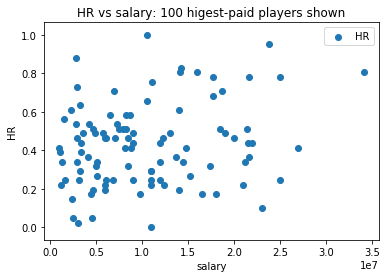

In [327]:
scatter = plt.scatter(df['Salary'], df[label_to_correlate])
line = ln.Line2D(X, regressor.predict(X), label='market rate')
plt.plot(line.get_xdata(), line.get_ydata(), label='market rate')
plt.title(label_to_correlate + ' vs salary: {} higest-paid players shown'.format(len(X)))
plt.xlabel('salary')
plt.ylabel(label_to_correlate)
plt.legend()
plt.show()